# The Boston Housing Dataset

#### The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The objective is to predict the value of prices of the house using the given features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv',header = None, delimiter = r"\s+", names = columns)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
print(df.shape)

(506, 14)


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Check missing data
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data(df)


,Total,Percent
MEDV,0,0.0
LSTAT,0,0.0
B,0,0.0
PTRATIO,0,0.0
TAX,0,0.0
RAD,0,0.0
DIS,0,0.0
AGE,0,0.0
RM,0,0.0
NOX,0,0.0


In [8]:
df = round(df,4)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0063,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.0273,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.0273,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.0324,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.0690,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### The following describes the dataset columns:

CRIM - per capita crime rate by town
<br>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
<br>INDUS - proportion of non-retail business acres per town.
<br>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
<br>NOX - nitric oxides concentration (parts per 10 million)
<br>RM - average number of rooms per dwelling
<br>AGE - proportion of owner-occupied units built prior to 1940
<br>DIS - weighted distances to five Boston employment centres
<br>RAD - index of accessibility to radial highways
<br>TAX - full-value property-tax rate per 10,000 USD
<br>PTRATIO - pupil-teacher ratio by town
<br>B - 1000(Bk - 0.63)^2 where Bk is the proportion of African Americans by town
<br>LSTAT - % lower status of the population
<br>MEDV - Median value of owner-occupied homes in thousdands


### Data Visualization

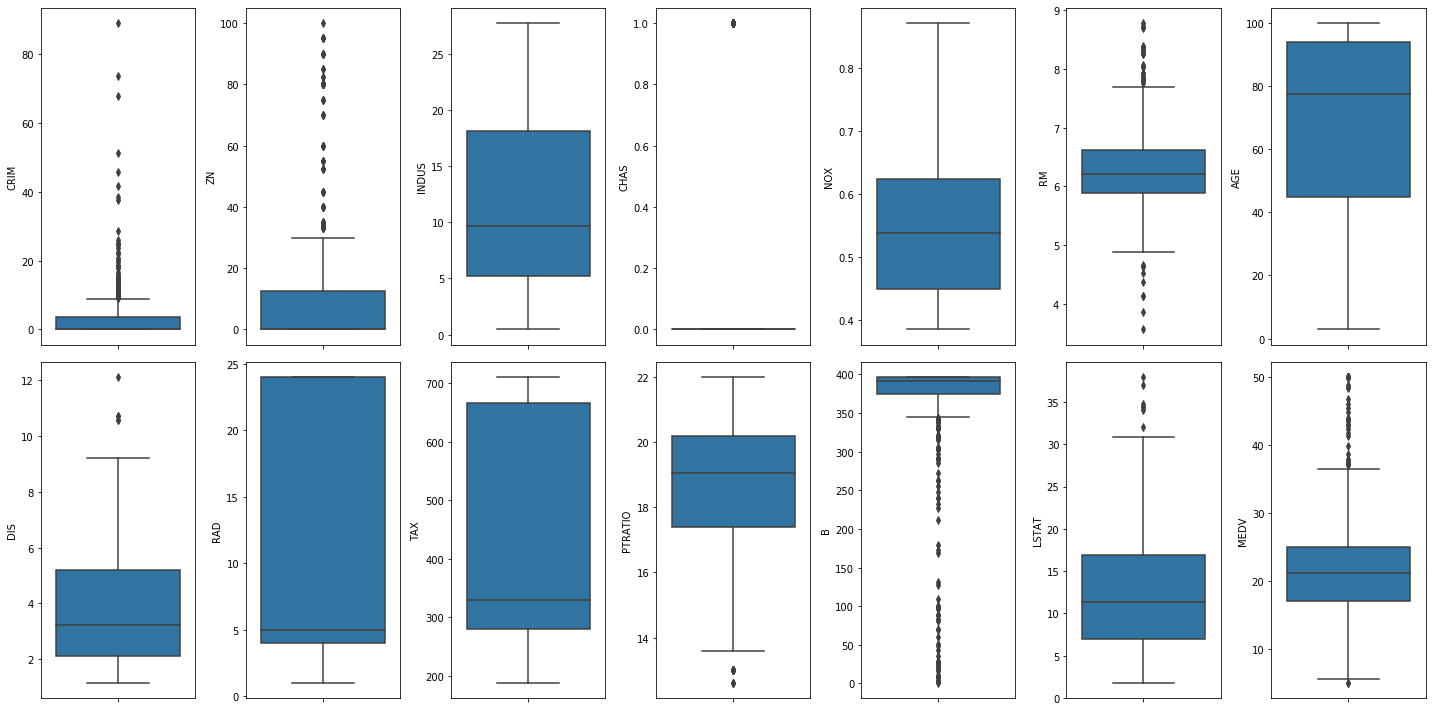

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i,j in df.items():
    sns.boxplot(y=i, data=df, ax=axs[index])
    index += 1
plt.tight_layout()


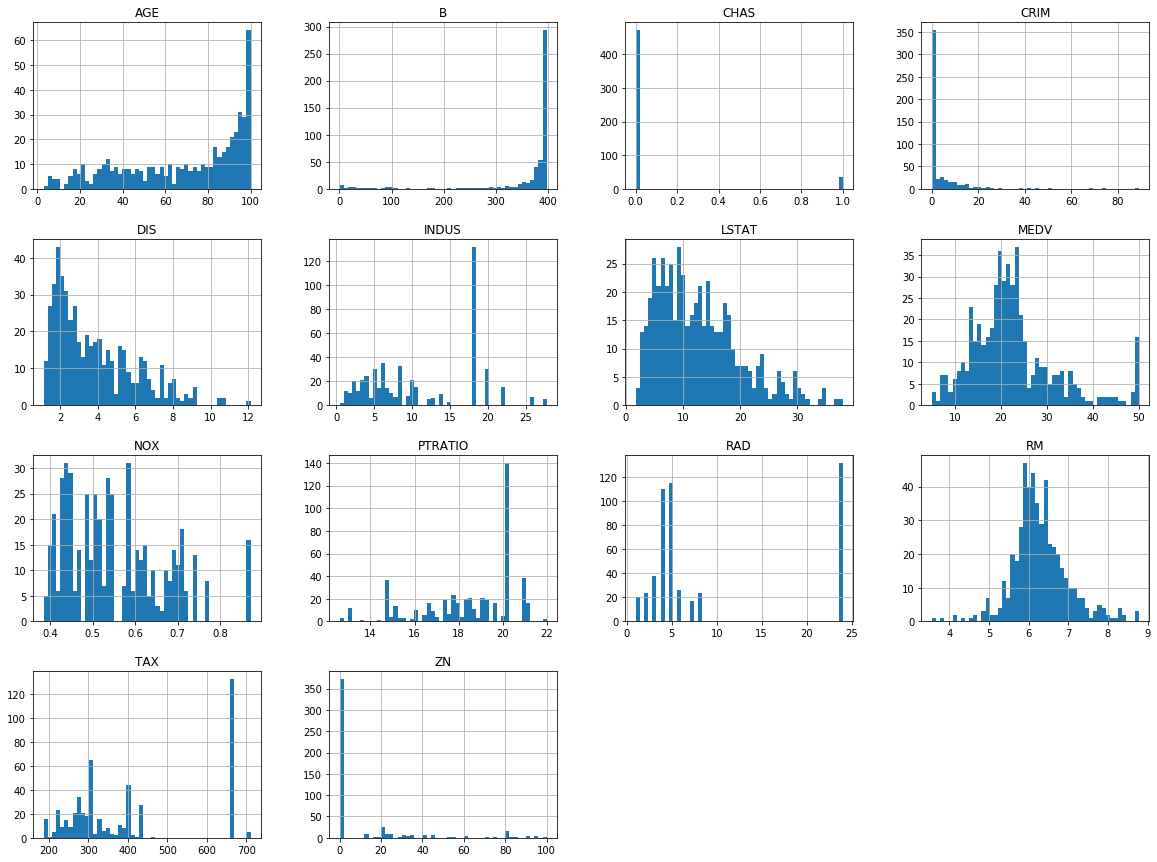

In [10]:
df.hist(bins = 50, figsize = (20,15))
plt.show()


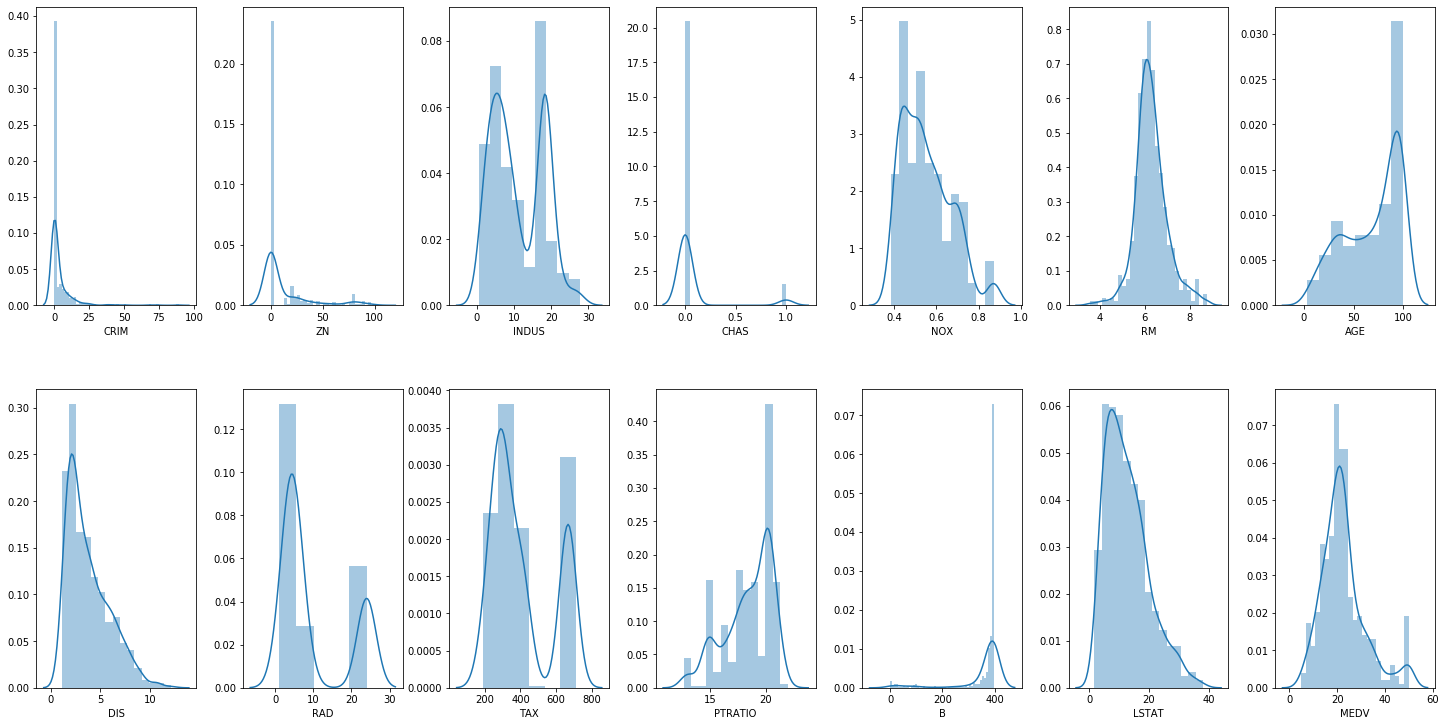

In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

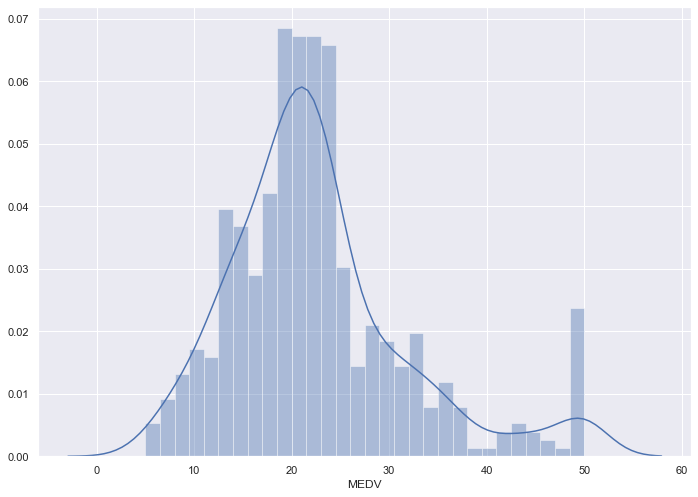

In [12]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(df['MEDV'], bins=30)
plt.show()


#### MEDV stops at 50, take out outliers

In [13]:
df = df[~(df['MEDV'] >= 50.0)]

In [14]:
df.shape

(490, 14)

### Correlation Heat Map

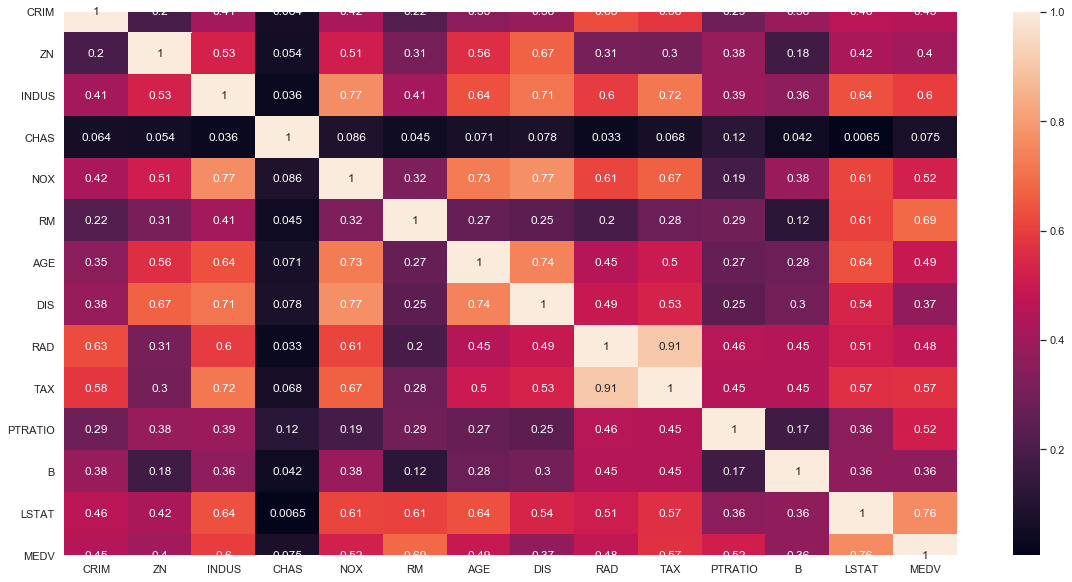

In [15]:

plt.figure(figsize = (20,10))
# plt.tight_layout()

sns.heatmap(df.corr().abs(), annot = True);

### RM & LSTAT most highly correlated with the target, MEDEV

Recall:
<br>RM - average number of rooms per dwelling
<br>LSTAT - % lower status of the population
<br>MEDV - Median value of owner-occupied homes in thousdands


In [16]:
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending = False)


MEDV       1.000000
RM         0.686634
ZN         0.404608
DIS        0.368813
B          0.364928
CHAS       0.074803
CRIM      -0.450115
RAD       -0.476296
AGE       -0.492915
PTRATIO   -0.518641
NOX       -0.524451
TAX       -0.572442
INDUS     -0.600005
LSTAT     -0.759837
Name: MEDV, dtype: float64

In [17]:
from pandas.plotting import scatter_matrix

attributes = ['MEDV','RM','ZN','LSTAT','INDUS']

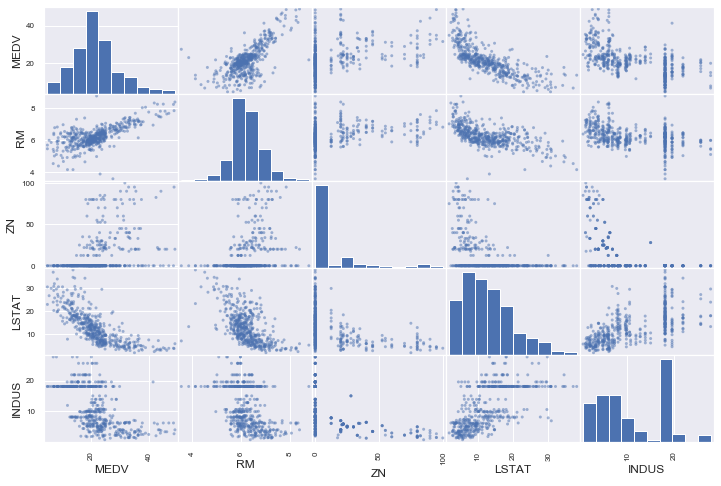

In [18]:
scatter_matrix(df[attributes], figsize = (12,8));


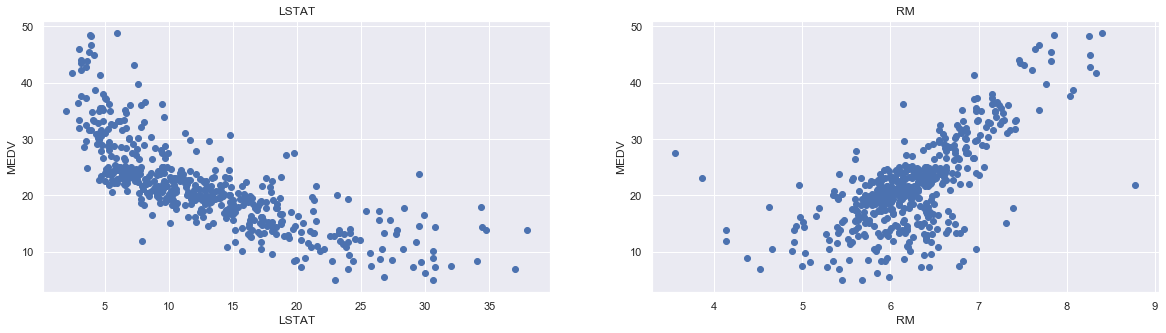

In [19]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    
    

# **Linear Regression**


In [20]:
# Prepare the data for training
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']


In [21]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(328, 2)
(162, 2)
(328,)
(162,)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 4.852325210639438
R2 score is 0.6160360392101498


The model performance for testing set
--------------------------------------
RMSE is 4.1175173479111455
R2 score is 0.7275835855770999


In [24]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =5)

# lr = LinearRegression()

# model = lr.fit(x_train,y_train)
# pred_y = lr.predict(x_test)
# df2 = pd.DataFrame({'Actual':y_test, 'Predict':pred_y})
# df2




In [25]:
# lin_model.fit(x_train,y_train)
# from sklearn.metrics import mean_squared_error, r2_score
# pred_y = lin_model.predict(x_test)
# pd.DataFrame({'Actual':y_test,'Predict':pred_y}).head()



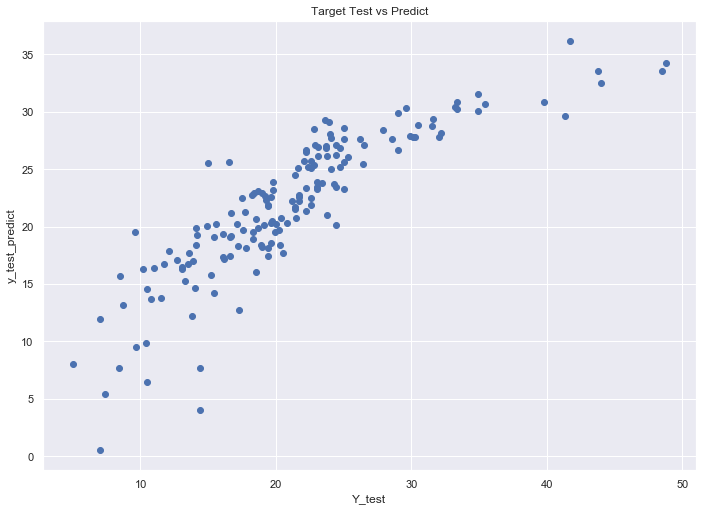

In [26]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.title("Target Test vs Predict")
plt.xlabel("Y_test")
plt.ylabel("y_test_predict")
plt.show()



# **Polynomial Regression**

We can see that **LSTAT** doesn't vary too well in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use Polyniomial Features class from sklearn library. 


In [27]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  poly_features = PolynomialFeatures(degree=degree)
  
  # transform the features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

  df3 = pd.DataFrame({'Actual':Y_test,'Predict':y_test_predict}).head()
  df3



In [28]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 3.9906568760115424
R2 score of training set is 0.7402955218518132


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.2923770342442333
R2 score of test set is 0.8258267224192751


# **More Models**

In [29]:

from sklearn import preprocessing
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from sklearn.linear_model import LinearRegression


In [30]:
## Preprocess data and scale to prepare for ML

In [31]:
x = df.iloc[:,0:13]
y = df['MEDV']

### Regression - another version

### PS comment: I think we should consider deleting this section, assuming we can improve the regression section above

In [32]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =5)

In [33]:
lm = LinearRegression()

In [34]:
model = lm.fit(x_train,y_train)
pred_y = lm.predict(x_test)
df2 = pd.DataFrame({'Actual':y_test, 'Predict':pred_y})
df2


,Actual,Predict
245,18.5,15.192961
456,12.7,12.805193
75,21.4,23.507053
238,23.7,28.656985
362,20.8,16.828613
...,...,...
386,10.5,7.323610
88,23.6,29.511752
232,41.7,35.461144
234,29.0,28.980261


In [35]:
linscore = model.score(x_train,y_train)
print(linscore)

0.7555026819519429


In [36]:
mse = sklearn.metrics.mean_squared_error(y_test, pred_y)
print(mse)

11.833879079661736


### Decision Tree

In [37]:
treemodel = DecisionTreeRegressor(max_depth = 5)

In [38]:
treemodel.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
pred_y = treemodel.predict(x_test)

In [41]:
pd.DataFrame({'Actual':y_test,'Predict':pred_y}).head()

,Actual,Predict
245,18.5,20.329167
456,12.7,15.336364
75,21.4,20.791837
238,23.7,24.873684
362,20.8,20.791837


In [42]:
score = treemodel.score(x_train,y_train)
print(score)

0.908594758767532


In [43]:
mse = sklearn.metrics.mean_squared_error(y_test, pred_y)
print(mse)

14.002734748150758


Text(0, 0.5, 'Predicted Y')

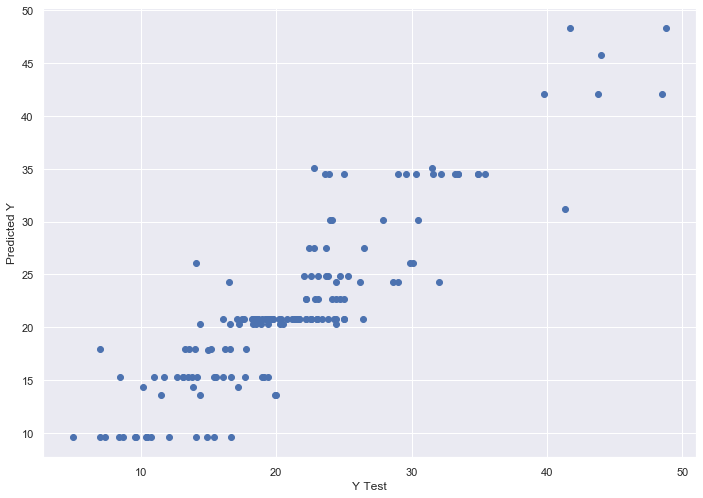

In [44]:
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


# **Yet More Models**

In [45]:
from sklearn import preprocessing

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import utils
from sklearn.model_selection import cross_val_score


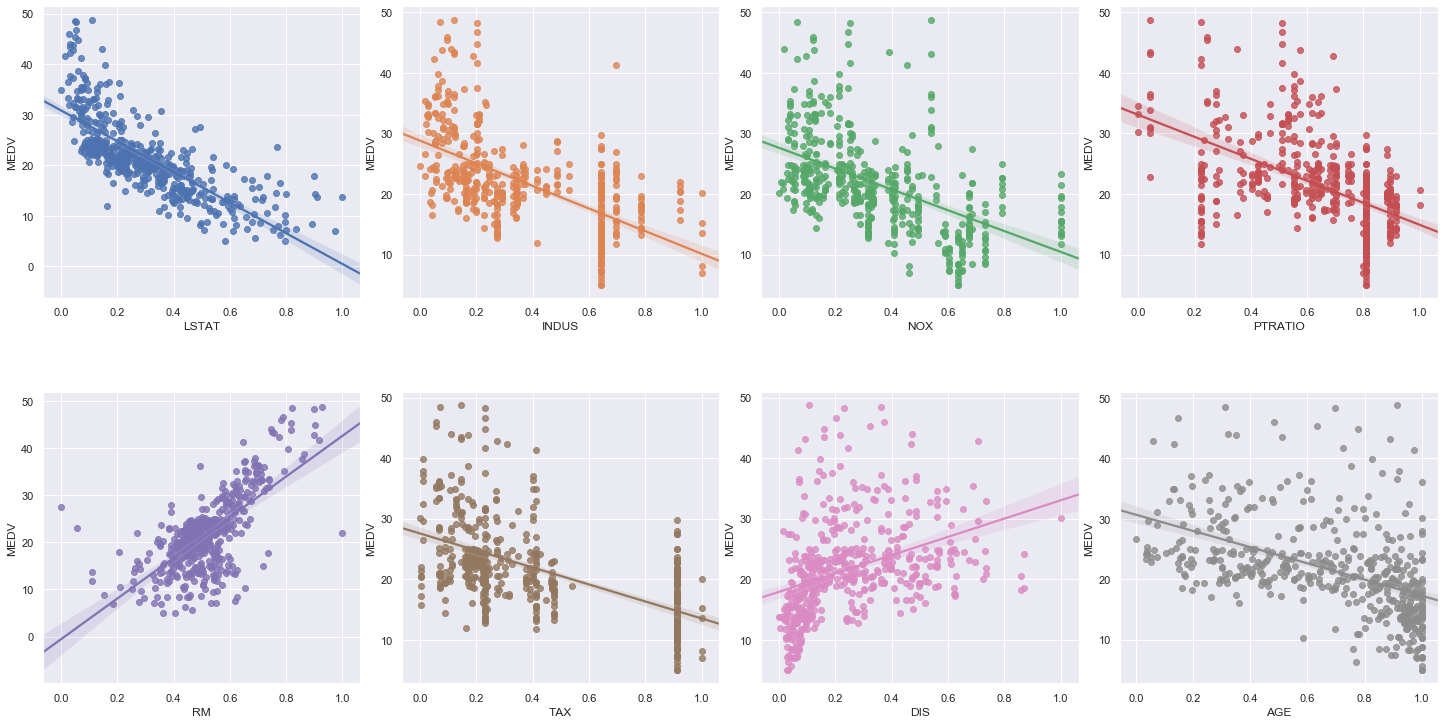

In [46]:
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [47]:
# remove the skewness of the data trough log transformation
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])
        

In [48]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#for degree in range(2, 6):
#    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


MSE: -0.04 (+/- 0.04)
MSE: -0.04 (+/- 0.04)
MSE: -0.03 (+/- 0.03)


In [49]:
l_regression.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
pred_y = l_regression.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':pred_y}).head()

,Actual,Predict
245,18.5,15.192961
456,12.7,12.805193
75,21.4,23.507053
238,23.7,28.656985
362,20.8,16.828613


In [50]:
l_ridge.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
pred_y = l_ridge.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':pred_y}).head()

,Actual,Predict
245,18.5,15.031734
456,12.7,13.137090
75,21.4,22.973935
238,23.7,28.582883
362,20.8,17.507171


In [51]:
model.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
pred_y = model.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':pred_y}).head()


c:\users\stepc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


,Actual,Predict
245,18.5,25.917790
456,12.7,25.275972
75,21.4,23.068712
238,23.7,27.163122
362,20.8,13.089339


In [52]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.03)


In [53]:
svr_rbf.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
pred_y = svr_rbf.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':pred_y}).head()



,Actual,Predict
245,18.5,22.060406
456,12.7,22.059747
75,21.4,21.837882
238,23.7,22.060408
362,20.8,22.060117


In [54]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)
#grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


MSE: -0.05 (+/- 0.04)


In [55]:
desc_tr.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
pred_y = desc_tr.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':pred_y}).head()



,Actual,Predict
245,18.5,20.329167
456,12.7,15.336364
75,21.4,20.791837
238,23.7,24.873684
362,20.8,20.791837


In [56]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
#grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))



KNN Accuracy: -0.04 (+/- 0.02)


In [57]:
knn.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
pred_y = knn.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':pred_y}).head()


,Actual,Predict
245,18.5,20.014286
456,12.7,11.600000
75,21.4,21.914286
238,23.7,23.900000
362,20.8,16.171429


In [58]:

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.03 (+/- 0.02)


In [59]:
gbr.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
pred_y = gbr.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':pred_y}).head()



,Actual,Predict
245,18.5,18.852052
456,12.7,16.005927
75,21.4,22.618288
238,23.7,24.075868
362,20.8,18.348084


# Choosing the best model 

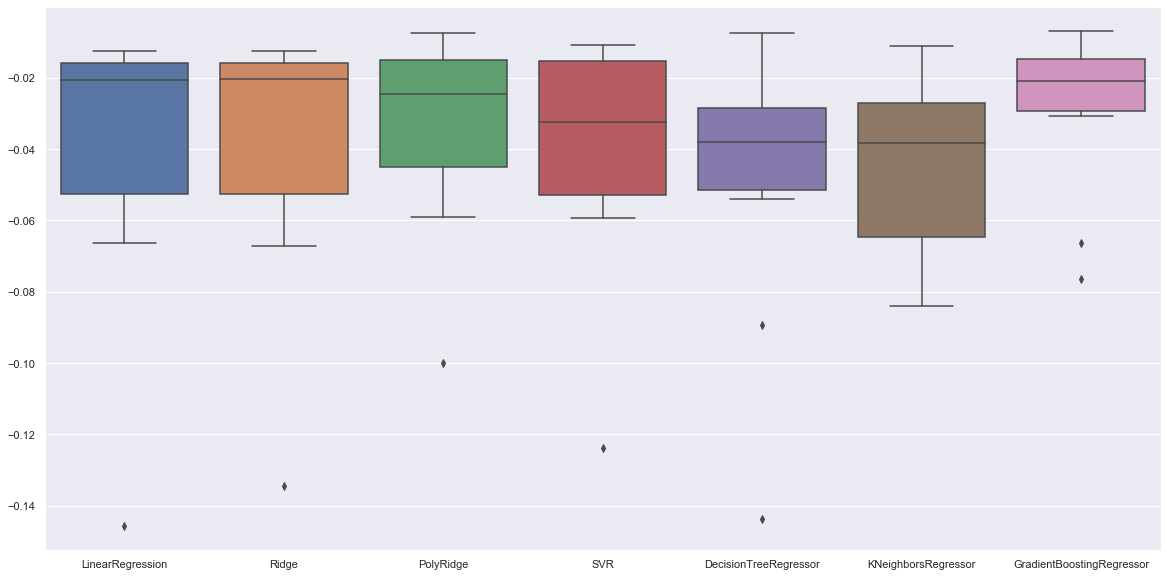

In [60]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)

In [61]:
# The models SVR and GradientBoostingRegressor show better performance with -11.62 (+/- 5.91) and -12.39 (+/- 5.86)


In [62]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


Best classifier : SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1.0,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MSE: -0.04 (+/- 0.03)


## Score Decision Tree Regressor

In [63]:
target = df['MEDV']
feature_names = df.columns


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, random_state=42)


In [65]:
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'AGE']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
x_scaled = min_max_scaler.fit_transform(x)


In [66]:
dtree = DecisionTreeRegressor(max_depth = 5)
scores = cross_val_score(dtree, x_scaled, y, scoring='neg_mean_squared_error')


c:\users\stepc\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [67]:
print(scores)

[-12.02562344 -22.8108765  -34.73446619]


## More stuff